<a href="https://colab.research.google.com/github/dutrajunior/python_estudos/blob/main/Discretiza%C3%A7%C3%A3o_de_dados_usando_Pandas_e_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

!pip install Faker
from faker import Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00


In [2]:
clientes = pd.read_csv('https://raw.githubusercontent.com/dutrajunior/python_estudos/main/users.csv')
clientes

,clientes,Age
0,101,14
1,102,20
2,103,27
3,104,39
4,105,54
5,106,56


Criar a classificação em grupos - Binning

In [3]:
clientes['idade_grupo'] = pd.cut(clientes.Age, bins = [0,20,40,60], labels = ['0-20', '20-40', '40-60'])
clientes

,clientes,Age,idade_grupo
0,101,14,0-20
1,102,20,0-20
2,103,27,20-40
3,104,39,20-40
4,105,54,40-60
5,106,56,40-60


Contar a quantidade de registros por grupo

In [4]:
clientes['idade_grupo'].value_counts()

0-20     2
20-40    2
40-60    2
Name: idade_grupo, dtype: int64

Outro exemplo

In [5]:
#criar lista com 100 produtos
fake = Faker()
Faker.seed(4321)
lista_produtos = []
fake = Faker()
for _ in range(100):
  lista_produtos.append(fake.name())

#criar lista com 100 preços
np.random.seed(7)
precos = []

for _ in range(100):
  preco = np.random.randint(1000,3000)
  precos.append(preco)

#Juntar listas de nomes em salarios em um dataframe
meusprecos = pd.DataFrame.from_dict({'Produtos': lista_produtos, 'Precos': precos})
meusprecos

,Produtos,Precos
0,Jason Brown,1175
1,Jacob Stein,2220
2,Cody Brown,1537
3,Larry Morales,1502
4,Jessica Hendricks,2603
...,...,...
95,Robert Garrett,1989
96,Parker Kent,2919
97,Michelle Logan,2439
98,Beverly Baker DVM,2154


# Criando os agrupamentos - *Bins* - Discretização


## Criando as dimensões dos grupos com *linspace*

O *linspace* serve para retornar números espaçados de modo uniforme em um intervalo especificado. Ajuda a dividir em bins. Logo após subtrair o
máximo pelo mínimo, divide o resultado por 4 bins (até 1000, de 1001
até 1666,66, até 2333,33 e após 3000)

In [6]:
bins = np.linspace(min(meusprecos['Precos']), max(meusprecos['Precos']),4)
bins

array([1033.        , 1683.33333333, 2333.66666667, 2984.        ])

## Criando os grupos e fazendo e fazendo a discretização

In [7]:
grupos = ['Baixo', 'Médio', 'Alto']
meusprecos['preco_com_binning']=pd.cut(meusprecos['Precos'], bins = bins, labels = grupos, include_lowest=True)
meusprecos

,Produtos,Precos,preco_com_binning
0,Jason Brown,1175,Baixo
1,Jacob Stein,2220,Médio
2,Cody Brown,1537,Baixo
3,Larry Morales,1502,Baixo
4,Jessica Hendricks,2603,Alto
...,...,...,...
95,Robert Garrett,1989,Médio
96,Parker Kent,2919,Alto
97,Michelle Logan,2439,Alto
98,Beverly Baker DVM,2154,Médio


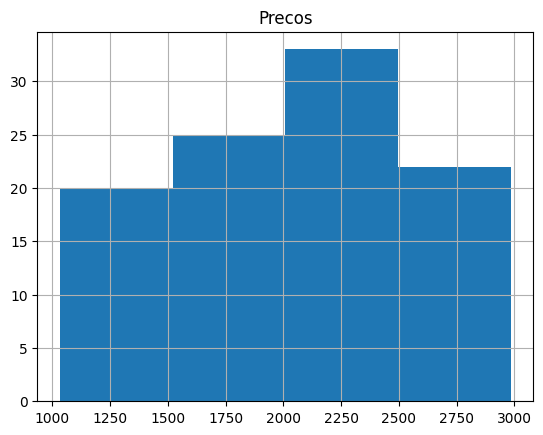

In [14]:
meusprecos.hist(column='Precos', bins=4)
plt.show()

<Axes: xlabel='preco_com_binning', ylabel='Count'>

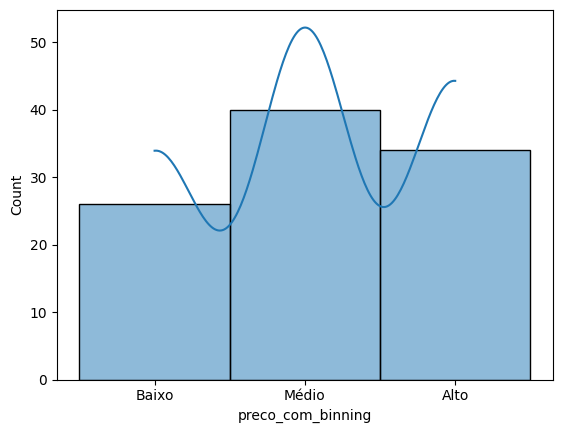

In [10]:
sns.histplot(meusprecos['preco_com_binning'], kde=True)